# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up constants

In [3]:
FULL_METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
REDUCED_METRICS_PATH = "../data/processed/xgboost_reduced_model_metrics.xlsx"
TRAIN_TEST_SPLIT_PATH = "../data/processed/train_test_split_model_metrics.xlsx"
SCORING_METRICS = ["precision_weighted", "recall_weighted", "roc_auc", "f1_weighted"]
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Read in data

In [4]:
df_full_metrics = pd.read_excel(FULL_METRICS_PATH)
df_full_metrics["raw_metric"] = pd.eval(df_full_metrics["raw_metric"])
df_full_metrics.insert(1, "feature_set", "Full")
df_full_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,Metal,precision_weighted,0.872005,0.017417,"[0.8588414089039871, 0.869296833064949, 0.8550..."
1,XGBClassifier,Full,Metal,recall_weighted,0.869565,0.020460,"[0.8529411764705882, 0.8695652173913043, 0.855..."
2,XGBClassifier,Full,Metal,roc_auc,0.927497,0.022293,"[0.9237379162191193, 0.9421052631578947, 0.901..."
3,XGBClassifier,Full,Metal,f1_weighted,0.866997,0.021750,"[0.8550857843137254, 0.8634143399867334, 0.855..."
4,XGBClassifier,Full,Insulator,precision_weighted,0.853680,0.012716,"[0.8529411764705882, 0.8235294117647058, 0.852..."
...,...,...,...,...,...,...,...
91,GradientBoostingClassifier,Full,MIT,f1_weighted,0.878487,0.034875,"[0.8840579710144928, 0.8607722427177874, 0.852..."
92,GradientBoostingClassifier,Full,Multiclass,precision_weighted,0.780808,0.008489,"[0.7677404295051354, 0.7960822166704519, 0.780..."
93,GradientBoostingClassifier,Full,Multiclass,recall_weighted,0.779412,0.014493,"[0.7647058823529411, 0.7941176470588235, 0.768..."
94,GradientBoostingClassifier,Full,Multiclass,roc_auc_ovr_weighted,0.912172,0.013247,"[0.9048784854851031, 0.9308212560386474, 0.918..."


In [5]:
df_reduced_metrics = pd.read_excel(REDUCED_METRICS_PATH)
df_reduced_metrics["raw_metric"] = pd.eval(df_reduced_metrics["raw_metric"])
df_reduced_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Reduced,Metal,precision_weighted,0.868866,0.028794,"[0.8817299495048856, 0.859903381642512, 0.8840..."
1,XGBClassifier,Reduced,Metal,recall_weighted,0.868606,0.028986,"[0.8840579710144928, 0.855072463768116, 0.8840..."
2,XGBClassifier,Reduced,Metal,roc_auc,0.902256,0.024079,"[0.9099999999999999, 0.9199999999999999, 0.927..."
3,XGBClassifier,Reduced,Metal,f1_weighted,0.863102,0.030771,"[0.8819740456569101, 0.8524675570711376, 0.884..."
4,XGBClassifier,Reduced,Insulator,precision_weighted,0.819357,0.017285,"[0.7954927425515661, 0.8120935330654, 0.826461..."
5,XGBClassifier,Reduced,Insulator,recall_weighted,0.817562,0.022805,"[0.7941176470588235, 0.8115942028985508, 0.823..."
6,XGBClassifier,Reduced,Insulator,roc_auc,0.893735,0.005465,"[0.8831168831168832, 0.8930976430976431, 0.898..."
7,XGBClassifier,Reduced,Insulator,f1_weighted,0.817371,0.022843,"[0.7941176470588235, 0.8116734149217173, 0.823..."
8,XGBClassifier,Reduced,MIT,precision_weighted,0.878857,0.003317,"[0.8752630995901187, 0.8793541825578438, 0.878..."
9,XGBClassifier,Reduced,MIT,recall_weighted,0.884058,0.001705,"[0.8823529411764706, 0.8840579710144928, 0.884..."


In [6]:
df_split_metrics = pd.read_excel(TRAIN_TEST_SPLIT_PATH)
df_split_metrics["raw_metric"] = pd.eval(df_split_metrics["raw_metric"])
df_split_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,raw_metric
0,XGBClassifier,holdout_test,Metal,precision_weighted,0.899115,"[0.9182900432900433, 0.7908163265306122, 0.884..."
1,XGBClassifier,holdout_test,Metal,recall_weighted,0.900000,"[0.9142857142857143, 0.8, 0.8857142857142857, ..."
2,XGBClassifier,holdout_test,Metal,roc_auc,0.845000,"[0.91, 0.7100000000000001, 0.83, 0.81, 0.9, 0...."
3,XGBClassifier,holdout_test,Metal,f1_weighted,0.895356,"[0.9154518950437319, 0.788013318534961, 0.8815..."
4,XGBClassifier,holdout_test,Insulator,precision_weighted,0.833123,"[0.8732919254658386, 0.8013071895424837, 0.858..."
5,XGBClassifier,holdout_test,Insulator,recall_weighted,0.814286,"[0.8285714285714286, 0.8, 0.8571428571428571, ..."
6,XGBClassifier,holdout_test,Insulator,roc_auc,0.816993,"[0.8333333333333333, 0.8006535947712418, 0.857..."
7,XGBClassifier,holdout_test,Insulator,f1_weighted,0.812143,"[0.8242857142857143, 0.8, 0.8571428571428571, ..."
8,XGBClassifier,holdout_test,MIT,precision_weighted,0.907029,"[0.8857142857142857, 0.9225806451612902, 0.942..."
9,XGBClassifier,holdout_test,MIT,recall_weighted,0.900000,"[0.8857142857142857, 0.9142857142857143, 0.942..."


# Summary plot

## Bar plot version

In [7]:
df_for_plot = df_full_metrics.replace(
    {"metric_name": {"roc_auc_ovr_weighted": "roc_auc"}}).sort_values(by="metric_value", ignore_index=True, ascending=False)

/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

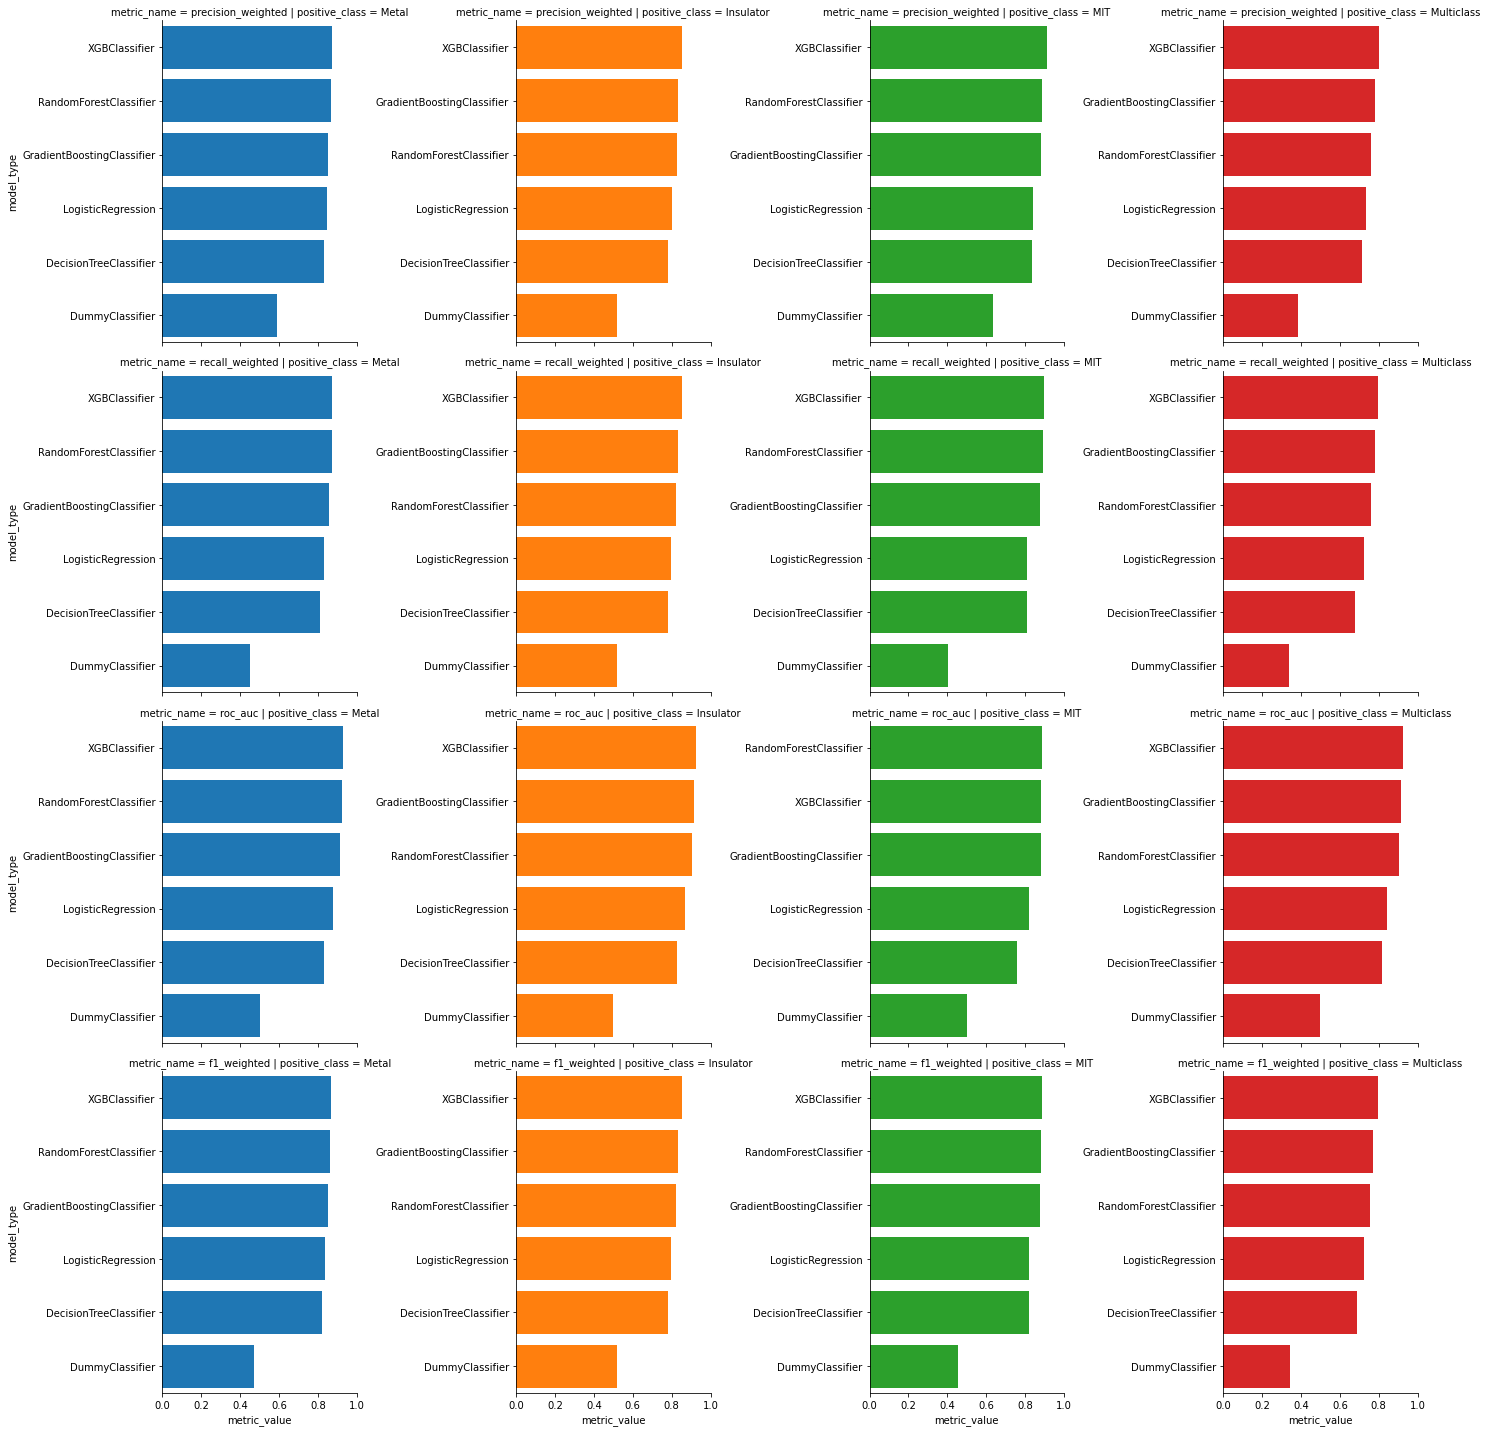

In [8]:
plt.figure(figsize=(10,10))
g_bar = sns.FacetGrid(df_for_plot, col="positive_class", row="metric_name", height=5, sharey=False,
                  col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                  hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                  xlim=(0, 1))
model_comparison_bar = g_bar.map(sns.barplot, "metric_value", "model_type", saturation=1)

In [9]:
def autolabel_bar(ax, **kwargs):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        width = rect.get_width()
        x, y, xerrs = get_errorbars(**kwargs)
        ax.errorbar(x, y, xerr=xerrs, capsize=3, ls="none", ecolor="black")
        ax.annotate('{:.4f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(-1, -12),
                    textcoords="offset points",
                    ha='right', va='center', fontsize=10, color="white")

        
def get_errorbars(metric_name, positive_class, df_input=df_for_plot):
    """Attach errorbars to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    x_pos = df_selected.metric_value
    y_pos = range(len(df_selected.model_type))
    x_errs = df_selected.metric_dispersion / 2
    return x_pos, y_pos, x_errs

In [10]:
for (metric, pos_class), ax in g_bar.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_bar(ax, metric_name=metric, positive_class=pos_class)

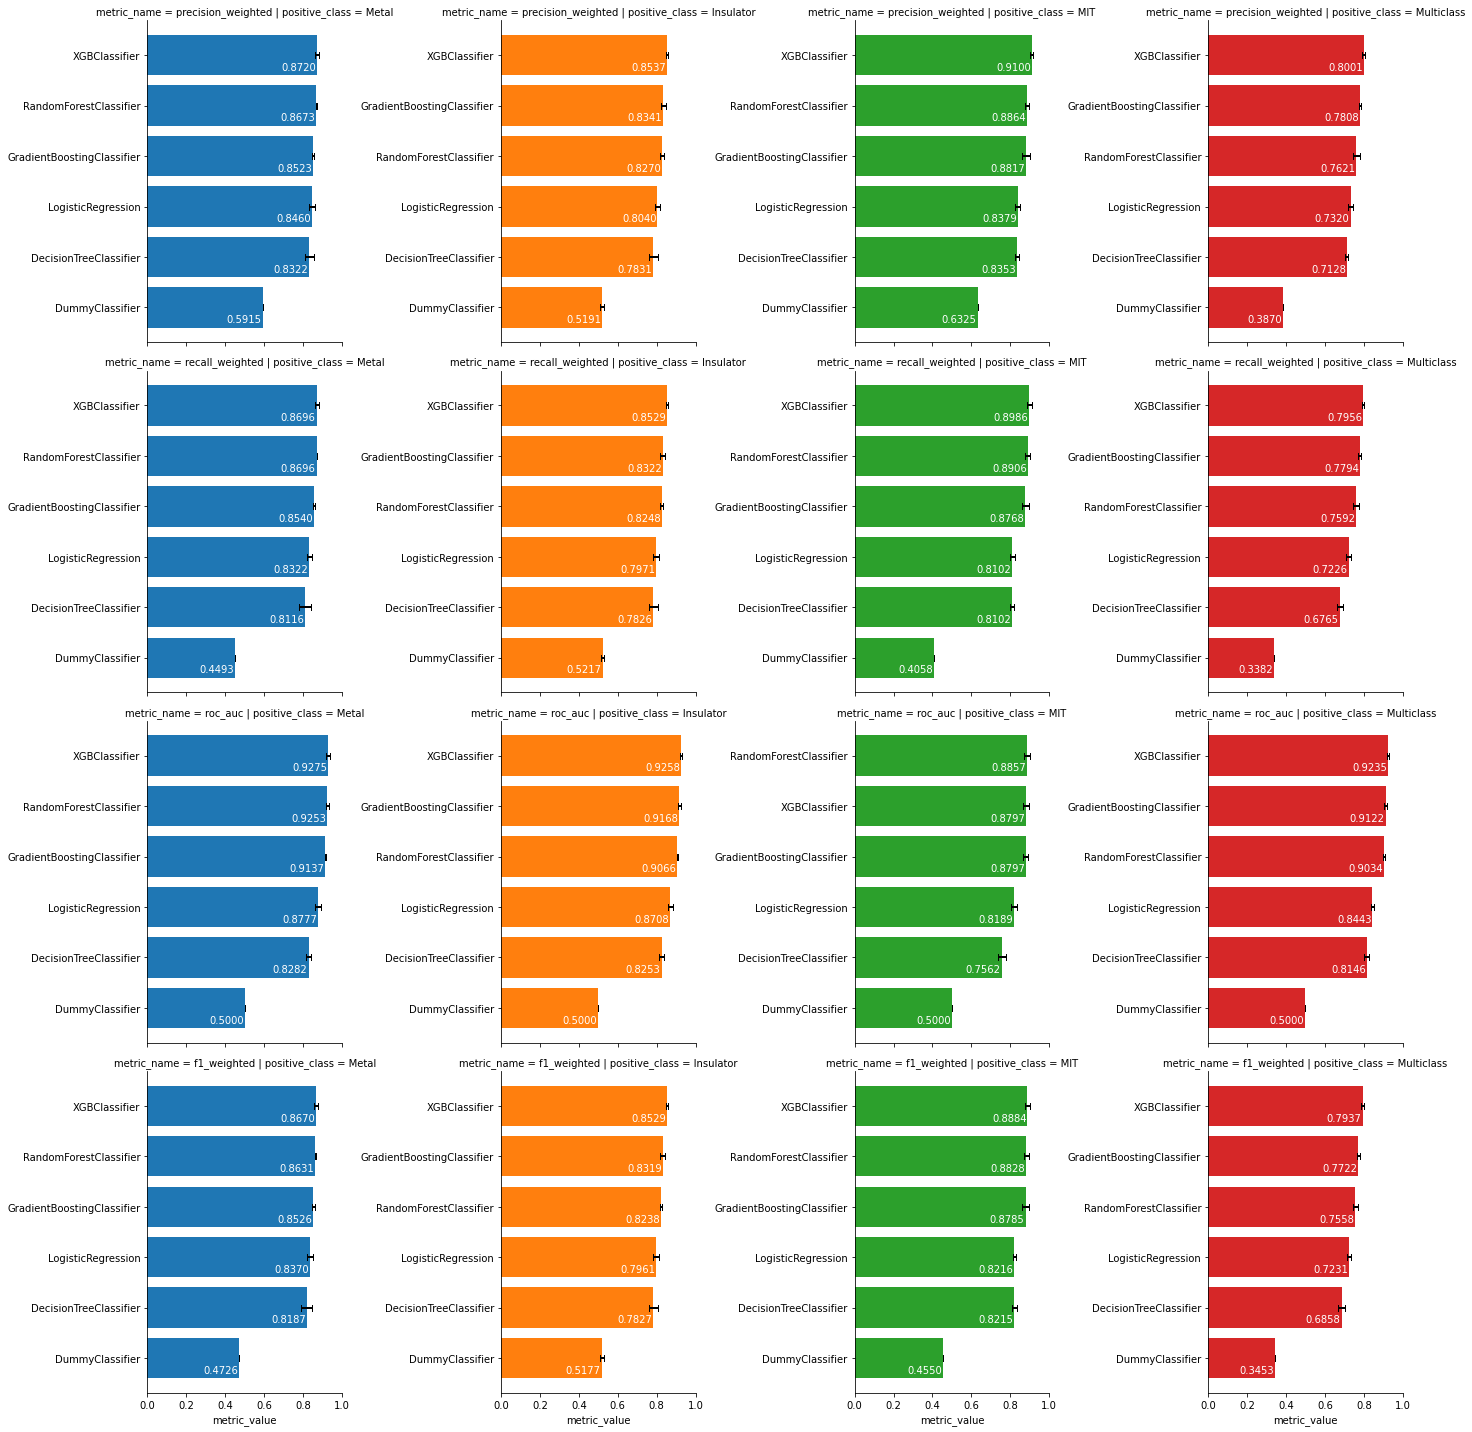

In [11]:
model_comparison_bar.fig

In [12]:
if SAVE_PLOT: model_comparison_bar.fig.savefig("../plots/model_comparison_bar.pdf", dpi=300, bbox_inches="tight")

## Boxplot version

In [13]:
df_for_boxplot = df_for_plot.drop(columns=["metric_dispersion"]).explode(column="raw_metric", ignore_index=True)
df_for_boxplot

,model_type,feature_set,positive_class,metric_name,metric_value,raw_metric
0,XGBClassifier,Full,Metal,roc_auc,0.927497,0.923738
1,XGBClassifier,Full,Metal,roc_auc,0.927497,0.942105
2,XGBClassifier,Full,Metal,roc_auc,0.927497,0.901053
3,XGBClassifier,Full,Metal,roc_auc,0.927497,0.917895
4,XGBClassifier,Full,Metal,roc_auc,0.927497,0.909474
...,...,...,...,...,...,...
955,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235
956,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235
957,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235
958,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235


/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

<Figure size 720x720 with 0 Axes>

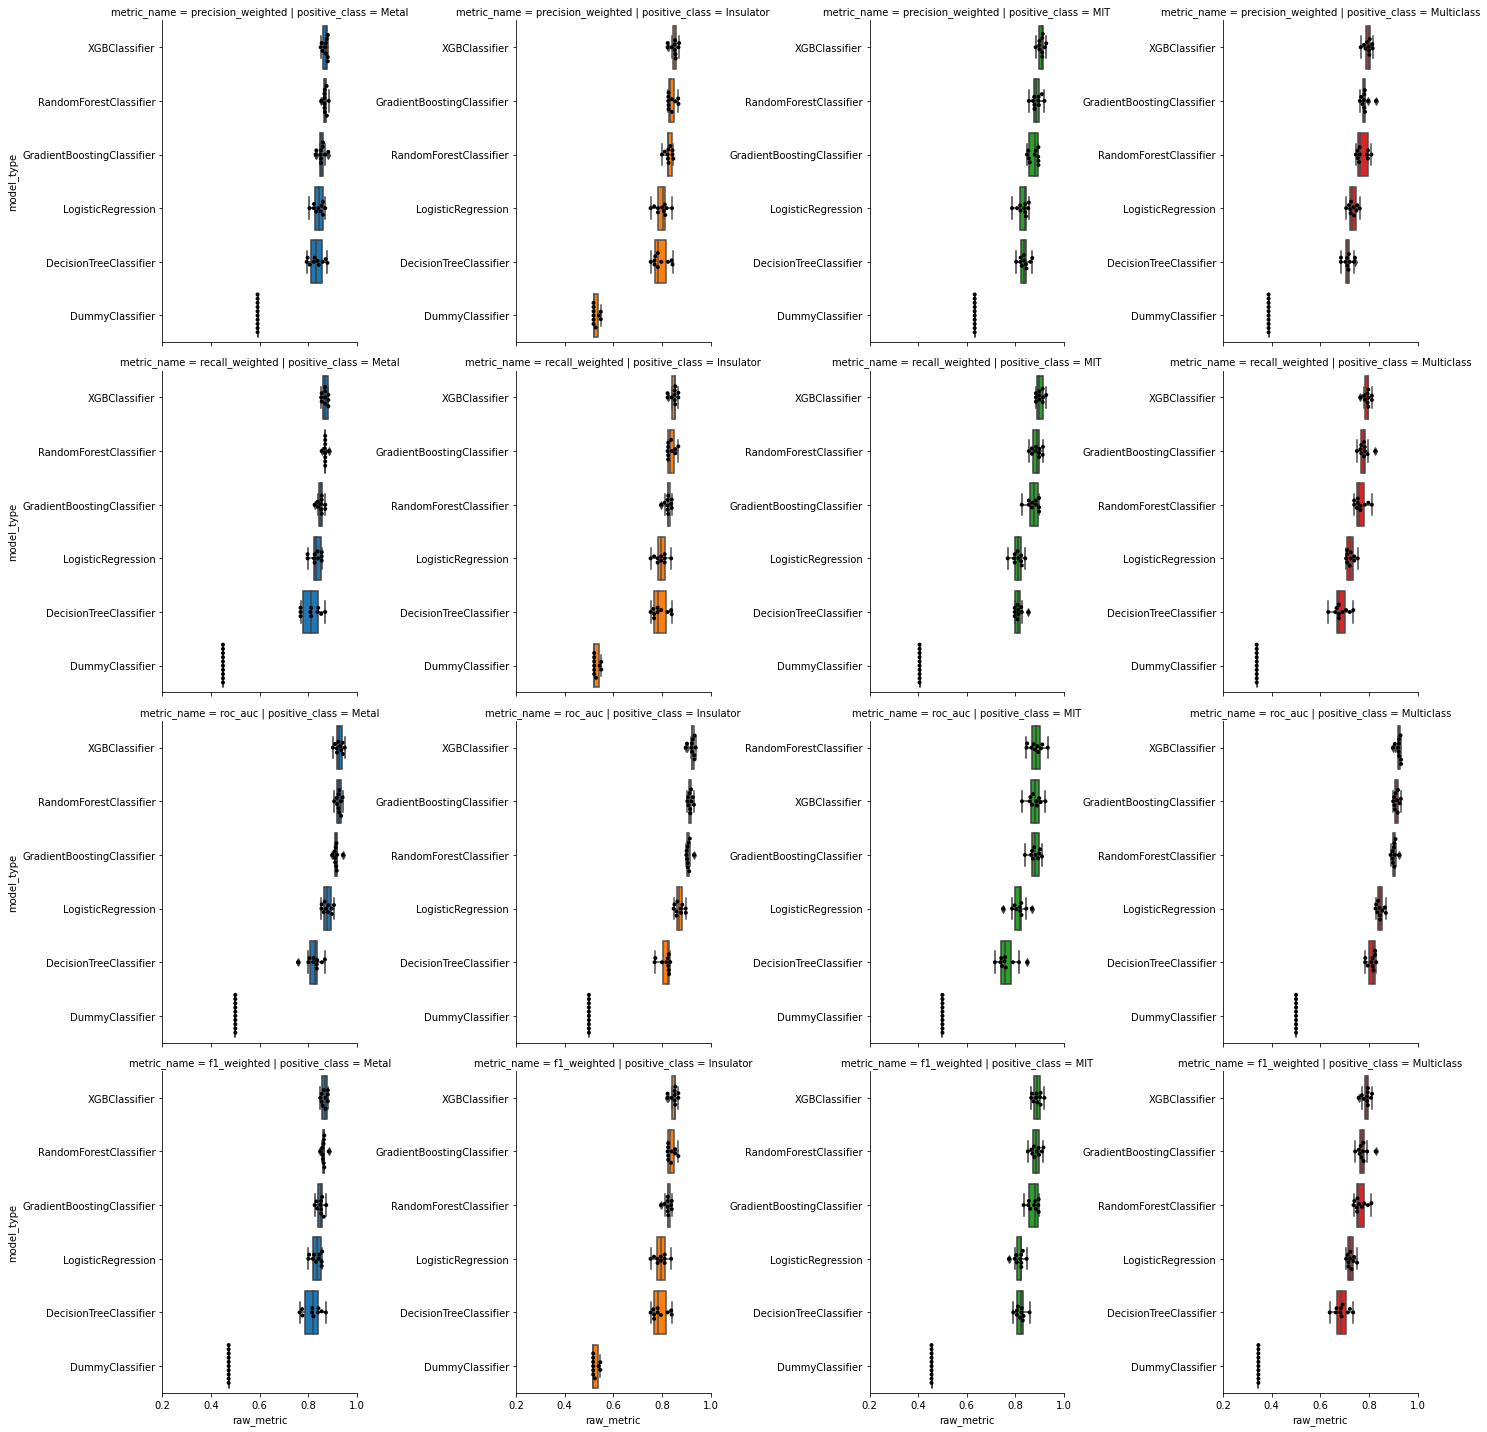

In [14]:
plt.figure(figsize=(10,10))

def fixed_boxplot(*args, label=None, **kwargs):
    """
    Custom boxplot function as a workaround for label error when sns.boxplot is passed to FacetGrid
    Adapted from https://github.com/mwaskom/seaborn/issues/915
    """
    sns.boxplot(*args, **kwargs, labels=[label])
    
g_box = sns.FacetGrid(data=df_for_boxplot, col="positive_class", row="metric_name", height=5, sharey=False, #aspect=2,
                      col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                      hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                      xlim=(0.2, 1))
model_comparison_boxplot = g_box.map(fixed_boxplot, "raw_metric", "model_type", saturation=1)
# overlay swarmplots on top of boxplots
g_box.map(sns.swarmplot, "raw_metric", "model_type", color="black", size=4)

In [15]:
def autolabel_box(ax, **kwargs):
    """
    Attach a text label besides each model type name, displaying the median value for the boxplot.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    x_lst, y_lst, metric_lst = get_stats(**kwargs)
    for x, y, metric in zip(x_lst, y_lst, metric_lst):
        ax.annotate('{:.4f}'.format(metric),
                    xy=(x, y),
                    xytext=(-5, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10, color="black")
    
        
def get_stats(metric_name, positive_class, df_input=df_for_plot, text_h_pos=0.24):
    """Get the stats to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    num_models = len(df_selected.model_type)
    x_pos = [text_h_pos] * num_models
    y_pos = range(num_models)
    metric_values = df_selected.metric_value
    return x_pos, y_pos, metric_values

In [16]:
for (metric, pos_class), ax in g_box.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_box(ax, metric_name=metric, positive_class=pos_class)

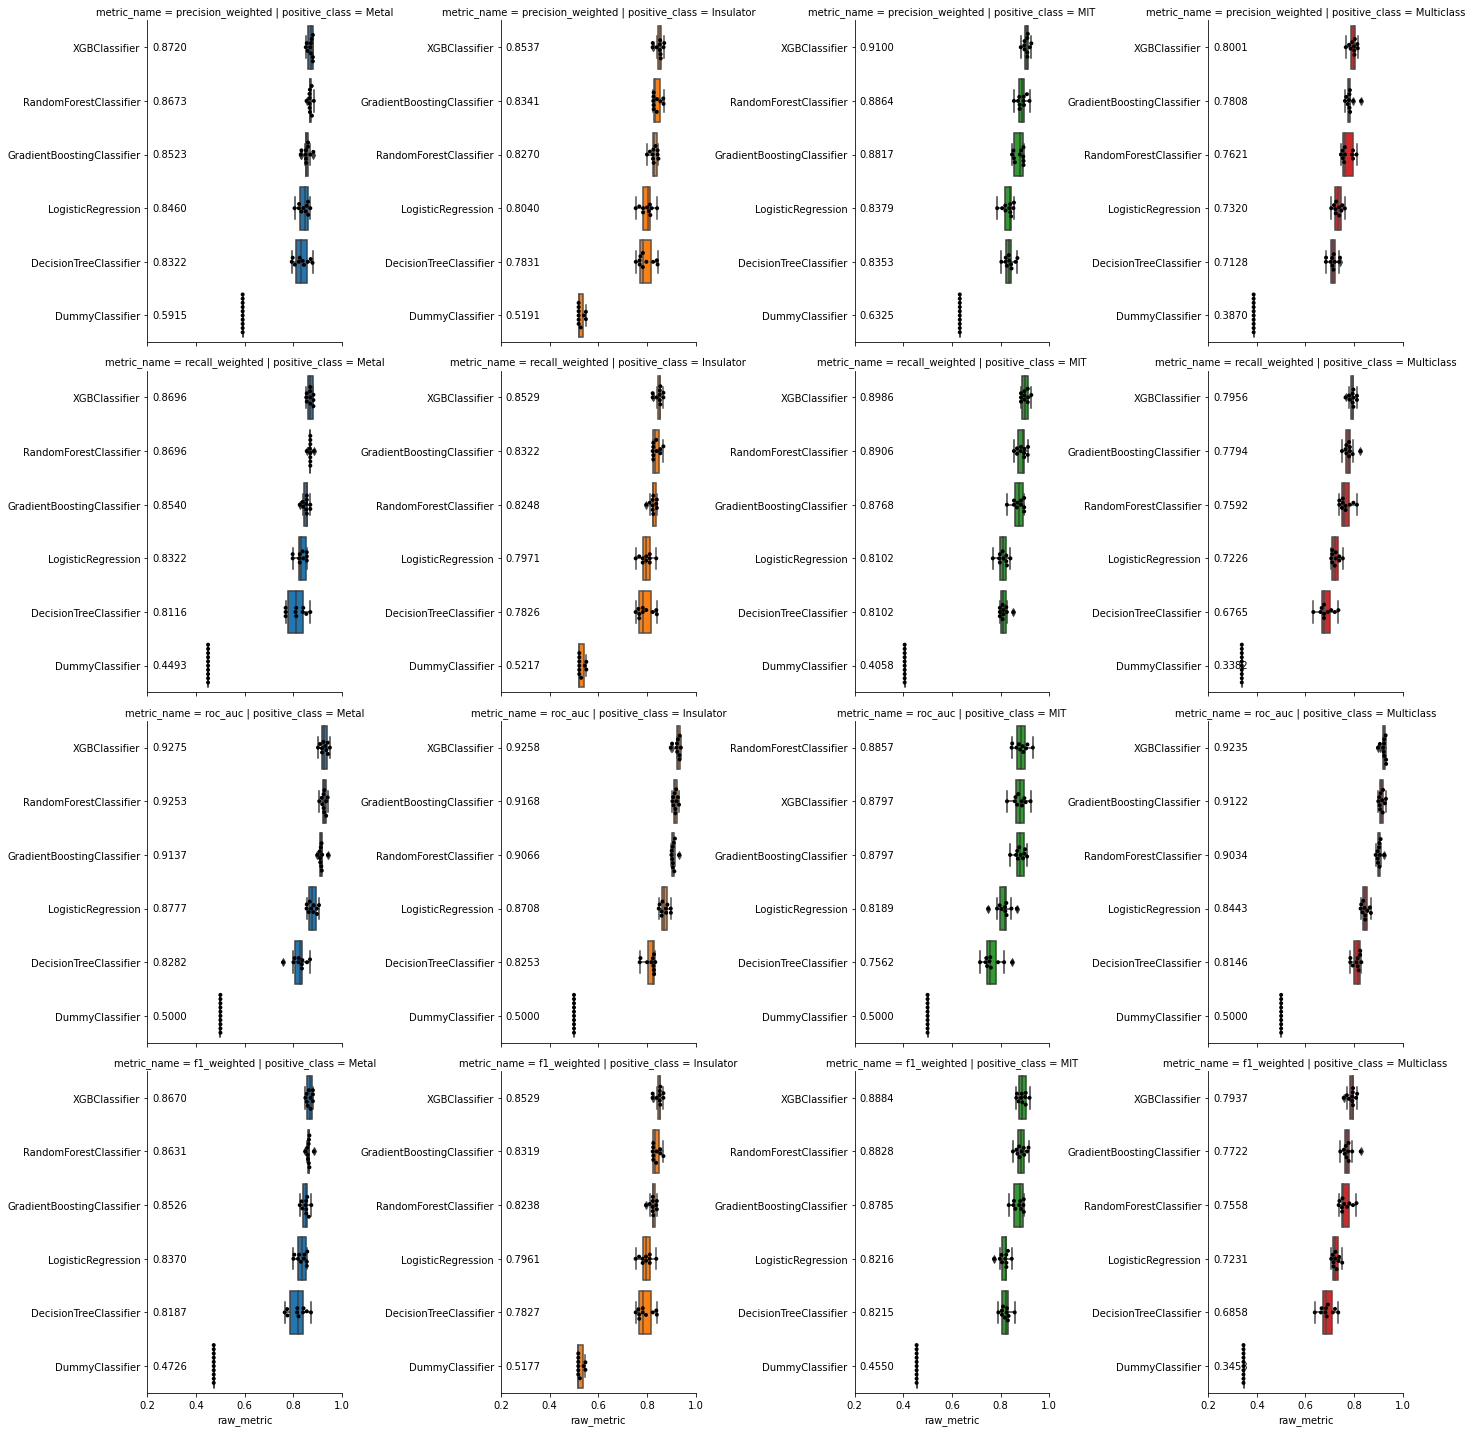

In [17]:
model_comparison_boxplot.fig

In [18]:
if SAVE_PLOT: model_comparison_boxplot.fig.savefig(SAVE_PATH + "model_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")

# Compare metrics between the full feature set and reduced feature set models

In [19]:
TICK_SIZE = 19
BARWIDTH = 0.2
CAPSIZE = 5

In [20]:
df_combined_metrics = pd.concat([df_full_metrics, df_reduced_metrics], ignore_index=True)
df_combined_metrics = df_combined_metrics.query('model_type == "XGBClassifier" & positive_class != "Multiclass"')
df_combined_metrics["quartiles"] = df_combined_metrics.apply(lambda row: np.percentile(row["raw_metric"], [25, 75]) - row["metric_value"], axis=1)
df_combined_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric,quartiles
0,XGBClassifier,Full,Metal,precision_weighted,0.872005,0.017417,"[0.8588414089039871, 0.869296833064949, 0.8550...","[-0.01055005892445049, 0.006866679682147714]"
1,XGBClassifier,Full,Metal,recall_weighted,0.869565,0.020460,"[0.8529411764705882, 0.8695652173913043, 0.855...","[-0.010869565217391242, 0.009590792838874651]"
2,XGBClassifier,Full,Metal,roc_auc,0.927497,0.022293,"[0.9237379162191193, 0.9421052631578947, 0.901...","[-0.010053705692803394, 0.012239527389903415]"
3,XGBClassifier,Full,Metal,f1_weighted,0.866997,0.021750,"[0.8550857843137254, 0.8634143399867334, 0.855...","[-0.01090586309413688, 0.010844234271592645]"
4,XGBClassifier,Full,Insulator,precision_weighted,0.853680,0.012716,"[0.8529411764705882, 0.8235294117647058, 0.852...","[-0.009945314321113563, 0.0027711218029021767]"
5,XGBClassifier,Full,Insulator,recall_weighted,0.852941,0.011402,"[0.8529411764705882, 0.8235294117647058, 0.852...","[-0.009271099744245559, 0.002131287297527762]"
6,XGBClassifier,Full,Insulator,roc_auc,0.925758,0.011887,"[0.8978354978354979, 0.9335016835016834, 0.935...","[-0.0036195286195286336, 0.008267195767195812]"
7,XGBClassifier,Full,Insulator,f1_weighted,0.852941,0.011472,"[0.8529411764705882, 0.8235294117647058, 0.852...","[-0.00937189234057112, 0.00210045460604924]"
8,XGBClassifier,Full,MIT,precision_weighted,0.910005,0.012892,"[0.9100046750818139, 0.8987807683459857, 0.910...","[-0.011223906735828182, 0.0016681566644930479]"
9,XGBClassifier,Full,MIT,recall_weighted,0.898551,0.024084,"[0.8985507246376812, 0.8840579710144928, 0.898...","[-0.010869565217391242, 0.013213981244671769]"


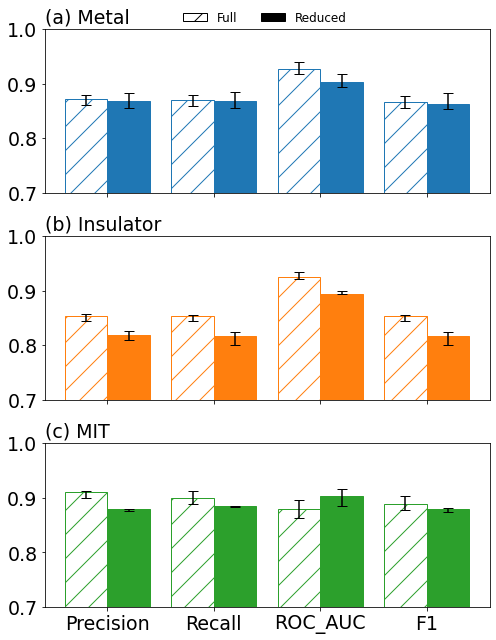

In [21]:
f, axarr = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(7, 9))

pos_classes = ["Metal", "Insulator", "MIT"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the three subplots in the order of "Metal", "Insulator", "MIT"
for i, (pos_class, color) in enumerate(zip(pos_classes, colors)):
    tit = ['(a) Metal', '(b) Insulator', '(c) MIT'][i]
    df_subplot = df_combined_metrics.loc[df_combined_metrics.positive_class == pos_class]
    ax = sns.barplot(data=df_subplot, x="metric_name", y="metric_value", hue="feature_set", 
                     palette=sns.color_palette(("w", color)), hue_order=["Full", "Reduced"], saturation=1, ax=axarr[i], edgecolor=color, hatch="/")
    ax.errorbar(x=np.arange(4)-0.2, y=df_subplot.loc[df_subplot.feature_set == "Full"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "Full"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    ax.errorbar(x=np.arange(4)+0.2, y=df_subplot.loc[df_subplot.feature_set == "Reduced"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "Reduced"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    axarr[i] = ax
    if i == 0:
        axarr[i].legend(frameon=False, loc=(0.3, 1),
                        ncol=2, fontsize=12)
        leg = axarr[i].get_legend()
        leg.legendHandles[0].set_color("white")
        leg.legendHandles[0].set_edgecolor("black")
        leg.legendHandles[1].set_color("black")
    else:
        axarr[i].get_legend().remove()
    
    axarr[i].set_xlabel(None)
    axarr[i].set_ylabel(None)
    axarr[i].set_ylim(0.7, 1.0)
    axarr[i].set_yticks([0.7, 0.8, 0.9, 1])
    axarr[i].set_title(tit, loc='left', fontsize=TICK_SIZE)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    
f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0, 1, 2, 3), ('Precision', 'Recall', 'ROC_AUC','F1'))
plt.tight_layout()

In [22]:
if SAVE_PLOT: f.savefig(SAVE_PATH + "full_reduced_models_comparison.pdf", dpi=300, bbox_inches="tight")

# Compare metrics between the CV and holdout_test models

In [23]:
df_combined_metrics = pd.concat([df_reduced_metrics.drop(columns="metric_dispersion"), df_split_metrics], ignore_index=True)
df_combined_metrics["quartiles"] = df_combined_metrics.apply(lambda row: np.percentile(row["raw_metric"], [25, 75]) - row["metric_value"], axis=1)
df_combined_metrics = df_combined_metrics.replace({"feature_set": {"Reduced": "CV"}})

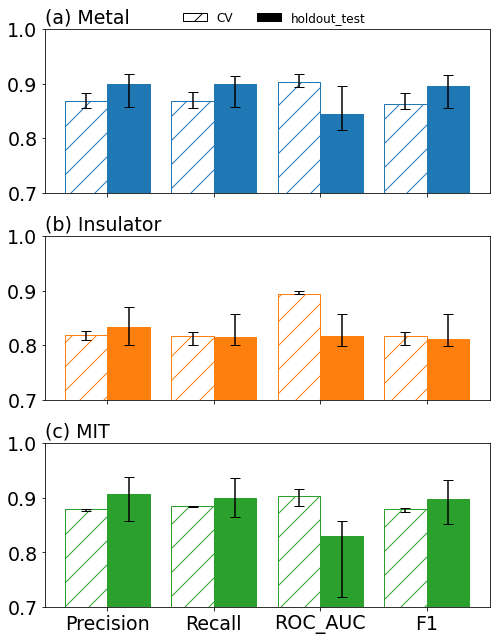

In [24]:
f, axarr = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(7, 9))

pos_classes = ["Metal", "Insulator", "MIT"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the three subplots in the order of "Metal", "Insulator", "MIT"
for i, (pos_class, color) in enumerate(zip(pos_classes, colors)):
    tit = ['(a) Metal', '(b) Insulator', '(c) MIT'][i]
    df_subplot = df_combined_metrics.loc[df_combined_metrics.positive_class == pos_class]
    ax = sns.barplot(data=df_subplot, x="metric_name", y="metric_value", hue="feature_set", 
                     palette=sns.color_palette(("w", color)), hue_order=["CV", "holdout_test"], saturation=1, ax=axarr[i], edgecolor=color, hatch="/")
    ax.errorbar(x=np.arange(4)-0.2, y=df_subplot.loc[df_subplot.feature_set == "CV"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "CV"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    ax.errorbar(x=np.arange(4)+0.2, y=df_subplot.loc[df_subplot.feature_set == "holdout_test"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "holdout_test"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    axarr[i] = ax
    if i == 0:
        axarr[i].legend(frameon=False, loc=(0.3, 1),
                        ncol=2, fontsize=12)
        leg = axarr[i].get_legend()
        leg.legendHandles[0].set_color("white")
        leg.legendHandles[0].set_edgecolor("black")
        leg.legendHandles[1].set_color("black")
    else:
        axarr[i].get_legend().remove()
    
    axarr[i].set_xlabel(None)
    axarr[i].set_ylabel(None)
    axarr[i].set_ylim(0.7, 1.0)
    axarr[i].set_yticks([0.7, 0.8, 0.9, 1])
    axarr[i].set_title(tit, loc='left', fontsize=TICK_SIZE)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    
f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0, 1, 2, 3), ('Precision', 'Recall', 'ROC_AUC','F1'))
plt.tight_layout()

In [25]:
if SAVE_PLOT: f.savefig(SAVE_PATH + "cv_holdout_test_models_comparison.pdf", dpi=300, bbox_inches="tight")

# Data exploration

In [26]:
df_full_metrics.loc[df_full_metrics.model_type == "XGBClassifier"]

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,Metal,precision_weighted,0.872005,0.017417,"[0.8588414089039871, 0.869296833064949, 0.8550..."
1,XGBClassifier,Full,Metal,recall_weighted,0.869565,0.020460,"[0.8529411764705882, 0.8695652173913043, 0.855..."
2,XGBClassifier,Full,Metal,roc_auc,0.927497,0.022293,"[0.9237379162191193, 0.9421052631578947, 0.901..."
3,XGBClassifier,Full,Metal,f1_weighted,0.866997,0.021750,"[0.8550857843137254, 0.8634143399867334, 0.855..."
4,XGBClassifier,Full,Insulator,precision_weighted,0.853680,0.012716,"[0.8529411764705882, 0.8235294117647058, 0.852..."
5,XGBClassifier,Full,Insulator,recall_weighted,0.852941,0.011402,"[0.8529411764705882, 0.8235294117647058, 0.852..."
6,XGBClassifier,Full,Insulator,roc_auc,0.925758,0.011887,"[0.8978354978354979, 0.9335016835016834, 0.935..."
7,XGBClassifier,Full,Insulator,f1_weighted,0.852941,0.011472,"[0.8529411764705882, 0.8235294117647058, 0.852..."
8,XGBClassifier,Full,MIT,precision_weighted,0.910005,0.012892,"[0.9100046750818139, 0.8987807683459857, 0.910..."
9,XGBClassifier,Full,MIT,recall_weighted,0.898551,0.024084,"[0.8985507246376812, 0.8840579710144928, 0.898..."


In [27]:
def rank_metrics(metric_name, class_type, df_input=df_full_metrics):
    return df_input.loc[(df_input.positive_class == class_type) & (df_input.metric_name == metric_name)].sort_values(by="metric_value", ascending=False, ignore_index=True)

In [28]:
rank_metrics("precision_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,MIT,precision_weighted,0.910005,0.012892,"[0.9100046750818139, 0.8987807683459857, 0.910..."
1,RandomForestClassifier,Full,MIT,precision_weighted,0.886396,0.018713,"[0.8952205882352942, 0.9084810957875973, 0.878..."
2,GradientBoostingClassifier,Full,MIT,precision_weighted,0.881706,0.038088,"[0.8840579710144928, 0.8589756592292089, 0.852..."
3,LogisticRegression,Full,MIT,precision_weighted,0.837870,0.022692,"[0.8204035237283319, 0.8194925028835064, 0.786..."
4,DecisionTreeClassifier,Full,MIT,precision_weighted,0.835257,0.022162,"[0.8260869565217391, 0.8033088235294118, 0.836..."
5,DummyClassifier,Full,MIT,precision_weighted,0.632467,0.000000,"[0.6324673029338989, 0.6324673029338989, 0.632..."


In [29]:
rank_metrics("recall_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,MIT,recall_weighted,0.898551,0.024084,"[0.8985507246376812, 0.8840579710144928, 0.898..."
1,RandomForestClassifier,Full,MIT,recall_weighted,0.890558,0.026854,"[0.8970588235294118, 0.9117647058823529, 0.867..."
2,GradientBoostingClassifier,Full,MIT,recall_weighted,0.876812,0.035592,"[0.8840579710144928, 0.8676470588235294, 0.855..."
3,LogisticRegression,Full,MIT,recall_weighted,0.810209,0.026428,"[0.7971014492753623, 0.7941176470588235, 0.768..."
4,DecisionTreeClassifier,Full,MIT,recall_weighted,0.810209,0.020514,"[0.8115942028985508, 0.8088235294117647, 0.823..."
5,DummyClassifier,Full,MIT,recall_weighted,0.405797,0.000000,"[0.4057971014492754, 0.4057971014492754, 0.405..."


In [30]:
rank_metrics("roc_auc", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,Full,MIT,roc_auc,0.885714,0.033966,"[0.8657342657342657, 0.9104895104895105, 0.893..."
1,XGBClassifier,Full,MIT,roc_auc,0.879720,0.032305,"[0.8615384615384616, 0.8867132867132868, 0.897..."
2,GradientBoostingClassifier,Full,MIT,roc_auc,0.879720,0.027273,"[0.8713286713286713, 0.8769230769230769, 0.897..."
3,LogisticRegression,Full,MIT,roc_auc,0.818881,0.026399,"[0.7961038961038961, 0.8671328671328672, 0.749..."
4,DecisionTreeClassifier,Full,MIT,roc_auc,0.756169,0.039873,"[0.7415584415584415, 0.7155844155844155, 0.757..."
5,DummyClassifier,Full,MIT,roc_auc,0.500000,0.000000,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [31]:
rank_metrics("f1_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,MIT,f1_weighted,0.888385,0.026318,"[0.8846773194599282, 0.8677484787018255, 0.887..."
1,RandomForestClassifier,Full,MIT,f1_weighted,0.882772,0.025487,"[0.8870417732310315, 0.9088760504201681, 0.865..."
2,GradientBoostingClassifier,Full,MIT,f1_weighted,0.878487,0.034875,"[0.8840579710144928, 0.8607722427177874, 0.852..."
3,LogisticRegression,Full,MIT,f1_weighted,0.821609,0.019575,"[0.8059543341536778, 0.8039585645578986, 0.773..."
4,DecisionTreeClassifier,Full,MIT,f1_weighted,0.821478,0.022202,"[0.8180694096726132, 0.80586115527292, 0.83027..."
5,DummyClassifier,Full,MIT,f1_weighted,0.454999,0.000000,"[0.4549994444179881, 0.4549994444179881, 0.454..."
